# **Cluster Analysis**
### 0.1 K-Means (Cluster Analysis)
                                                   -Sumit Sumit

Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [4]:
data=pd.read_csv("/content/retail_segmentation.csv",index_col=0)

In [5]:
df = data.copy()

In [6]:
df.head()

,avg_order_size,avg_order_freq,crossbuy,multichannel,per_sale,tenure,return_rate,married,own_home,household_size,loyalty_card,income,age,avg_mktg_cnt,zip_code
Cust_No,,,,,,,,,,,,,,,
1,23.400000,2.222222,3,2,0.000000,3,0.117521,1,1,1,1,35,47,56.000000,21230
2,34.260377,6.625000,7,2,0.111111,35,0.281868,1,1,3,1,140,70,14.914286,22301
3,43.575641,4.875000,5,2,0.074074,12,0.274177,1,0,4,0,35,21,20.083333,19002
4,26.316667,0.900000,4,2,0.250000,9,0.143551,0,0,1,1,35,62,8.222222,22304
5,8.269231,1.083333,3,1,0.500000,40,0.000000,0,0,2,0,140,21,1.350000,20124


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   avg_order_size  2000 non-null   float64
 1   avg_order_freq  2000 non-null   float64
 2   crossbuy        2000 non-null   int64  
 3   multichannel    2000 non-null   int64  
 4   per_sale        2000 non-null   float64
 5   tenure          2000 non-null   int64  
 6   return_rate     2000 non-null   float64
 7   married         2000 non-null   int64  
 8   own_home        2000 non-null   int64  
 9   household_size  2000 non-null   int64  
 10  loyalty_card    2000 non-null   int64  
 11  income          2000 non-null   int64  
 12  age             2000 non-null   int64  
 13  avg_mktg_cnt    2000 non-null   float64
 14  zip_code        2000 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 250.0 KB


In [8]:
df.describe()

,avg_order_size,avg_order_freq,crossbuy,multichannel,per_sale,tenure,return_rate,married,own_home,household_size,loyalty_card,income,age,avg_mktg_cnt,zip_code
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,35.372873,1.556402,2.608000,1.557000,0.103311,14.121500,0.176705,0.463500,0.568000,2.869000,0.618500,75.787500,42.932500,12.936430,18325.694000
std,25.527527,2.217543,1.573396,0.670802,0.188167,12.101569,0.351940,0.498791,0.495478,2.263714,0.485876,44.292192,22.656536,18.074694,5342.881879
min,1.833333,0.027778,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.000000,21.000000,0.000000,7726.000000
25%,23.157337,0.307692,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,35.000000,21.000000,4.000000,19010.000000
50%,30.790000,0.769231,2.000000,1.000000,0.000000,10.000000,0.019475,0.000000,1.000000,2.000000,1.000000,60.000000,37.000000,7.750000,20854.000000
75%,40.958854,1.905844,4.000000,2.000000,0.139977,20.000000,0.245596,1.000000,1.000000,4.000000,1.000000,110.000000,61.250000,15.000000,21776.500000
max,528.250000,31.875000,7.000000,3.000000,1.000000,40.000000,6.909091,1.000000,1.000000,8.000000,1.000000,175.000000,99.000000,297.000000,24060.000000


Creating Scatterplot

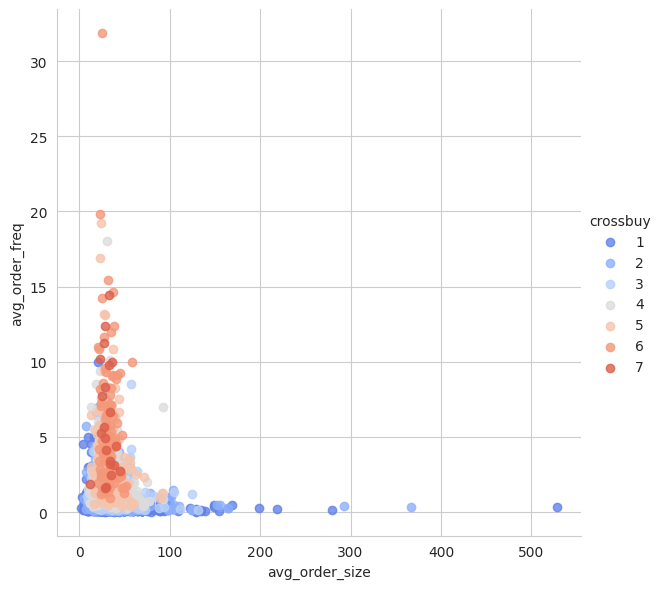

In [9]:
# Set the style of the plot
sns.set_style('whitegrid')
# Create a scatterplot of avg_order_freq versus avg_order_size with points colored by the crossbuy column
plot = sns.lmplot(x='avg_order_size', y='avg_order_freq', data=df, hue='crossbuy',palette='coolwarm', height=6, aspect=1, fit_reg=False)
# Display the plot
plt.show()

Creating Scatterplot

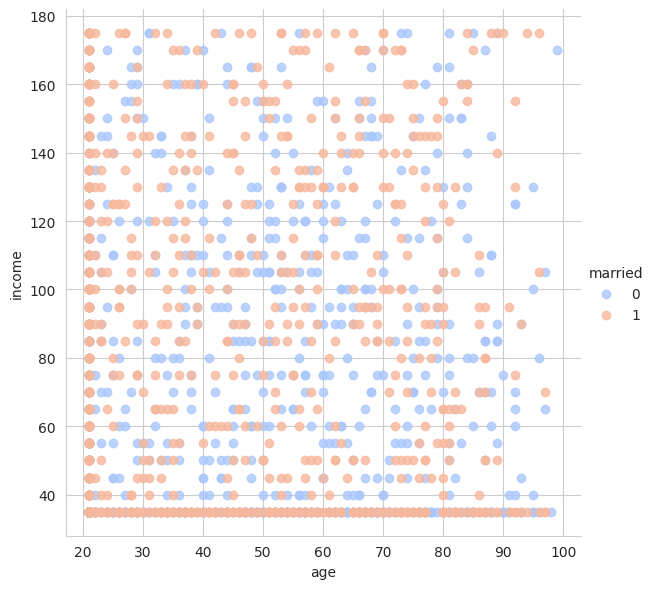

In [10]:
#Create a scatterplot of income versus age where the points are colored by the married column.
sns.set_style('whitegrid')
sns.lmplot(x='age', y='income',data=df, hue='married',
palette='coolwarm',height=6,aspect=1,fit_reg=False)
plt.show()

Creating a Stacked Histogram

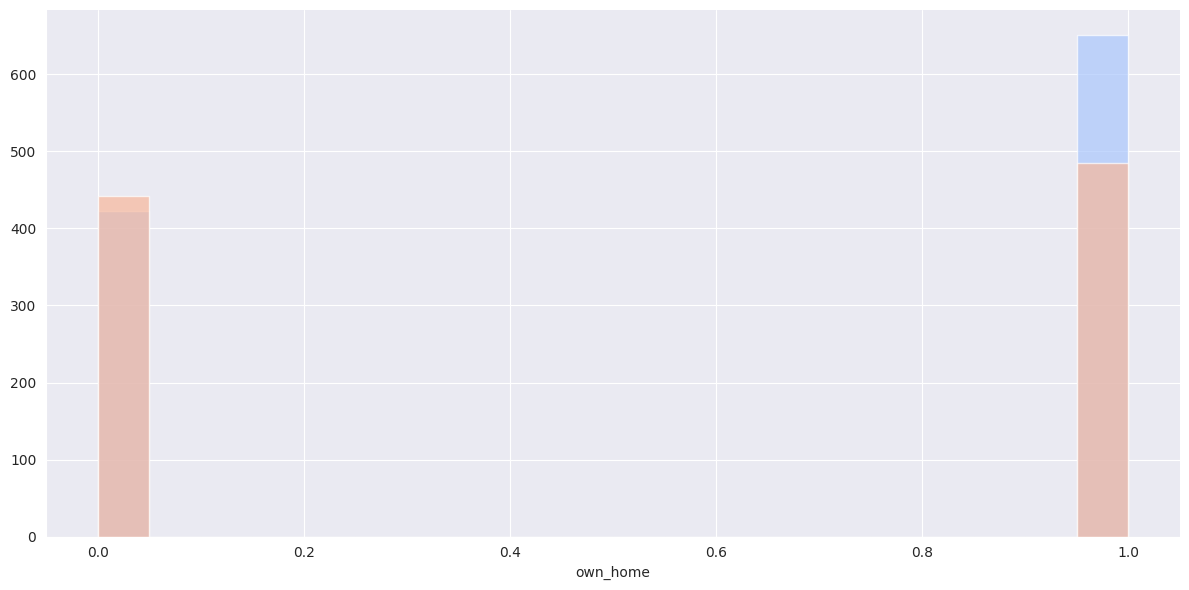

In [11]:
#Create a stacked histogram showing Out of own_home based on the married column.
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="married",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'own_home',bins=20,alpha=0.7)
plt.show()

Creating a histogram

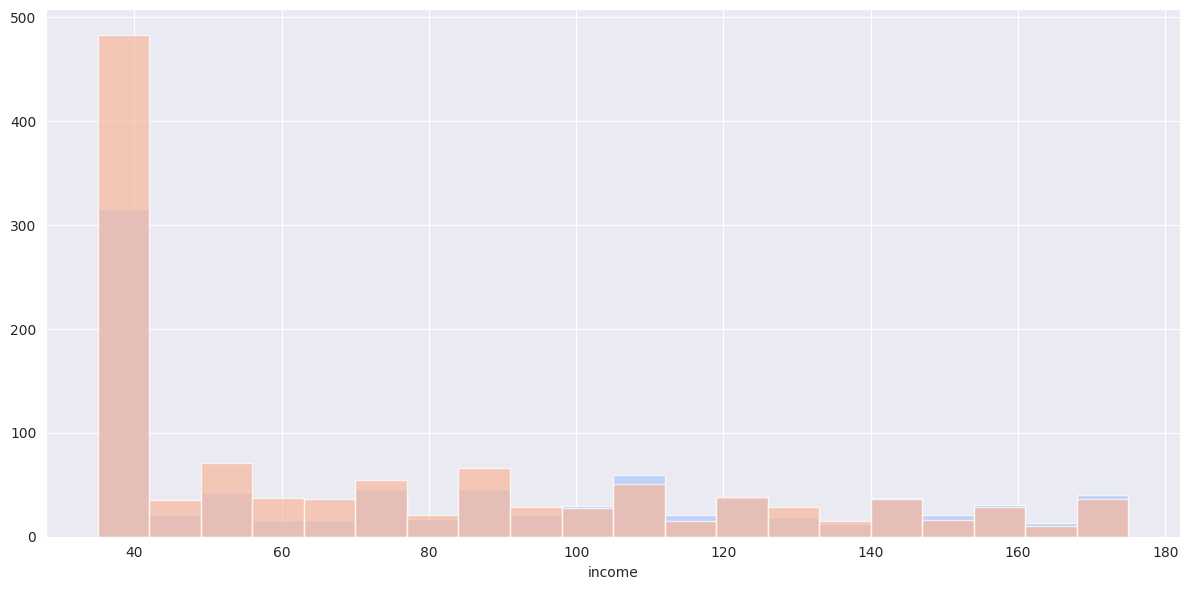

In [12]:
#Create a similar histogram for the income column.
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="own_home",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'income',bins=20,alpha=0.7)
plt.show()

Creating a histogram

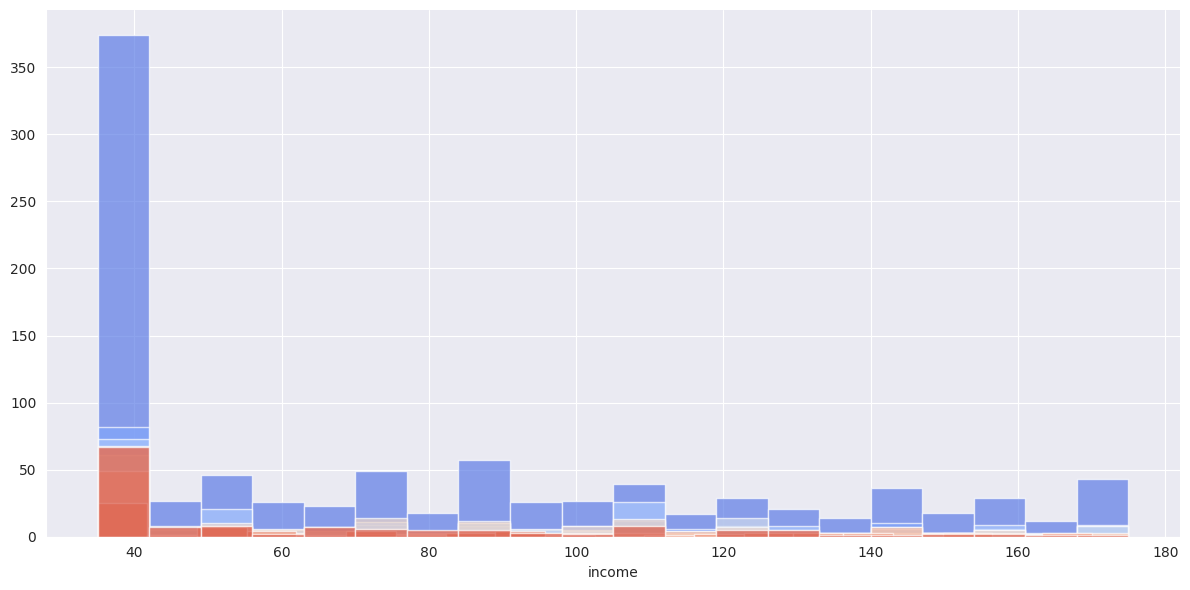

In [13]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="household_size",palette='coolwarm',height=6,aspect=2)
g = g.map(plt.hist,'income',bins=20,alpha=0.7)
plt.show()

K Means Cluster Creation

Import KMeans from SciKit Learn.

In [14]:
from sklearn.cluster import KMeans

Create an instance of a K Means model with 2 clusters

In [15]:
kmeans=KMeans(n_clusters=2, n_init=10)

Fit the model to all the data except for the Private label

In [16]:
kmeans.fit(df.drop('age',axis=1))

KMeans(n_clusters=2, n_init=10)

Cluster Center Vectors

In [17]:
kmeans.cluster_centers_

array([[3.57023567e+01, 1.54539313e+00, 2.61005089e+00, 1.57760814e+00,
        1.05827590e-01, 1.42843511e+01, 1.71089630e-01, 4.75826972e-01,
        5.62340967e-01, 2.85305344e+00, 6.05597964e-01, 7.56488550e+01,
        1.27477580e+01, 2.10594256e+04],
       [3.41627141e+01, 1.59683769e+00, 2.60046729e+00, 1.48130841e+00,
        9.40689456e-02, 1.35233645e+01, 1.97328839e-01, 4.18224299e-01,
        5.88785047e-01, 2.92757009e+00, 6.65887850e-01, 7.62967290e+01,
        1.36294028e+01, 8.28497897e+03]])

## 0.2 Evaluation

Create a new column for df called 'Cluster'

In [18]:
def converter(cluster):
  if cluster=='Yes':
   return 1
  else:
   return 0

In [19]:
df['Cluster'] = df['age'].apply(converter)

In [20]:
df.head()

,avg_order_size,avg_order_freq,crossbuy,multichannel,per_sale,tenure,return_rate,married,own_home,household_size,loyalty_card,income,age,avg_mktg_cnt,zip_code,Cluster
Cust_No,,,,,,,,,,,,,,,,
1,23.400000,2.222222,3,2,0.000000,3,0.117521,1,1,1,1,35,47,56.000000,21230,0
2,34.260377,6.625000,7,2,0.111111,35,0.281868,1,1,3,1,140,70,14.914286,22301,0
3,43.575641,4.875000,5,2,0.074074,12,0.274177,1,0,4,0,35,21,20.083333,19002,0
4,26.316667,0.900000,4,2,0.250000,9,0.143551,0,0,1,1,35,62,8.222222,22304,0
5,8.269231,1.083333,3,1,0.500000,40,0.000000,0,0,2,0,140,21,1.350000,20124,0


Create a confusion matrix and classification report to see how well the KMeans clustering worked without being given any label

In [21]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[1572  428]
 [   0    0]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.79      2000
   macro avg       0.50      0.39      0.44      2000
weighted avg       1.00      0.79      0.88      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Discriminant Analysis

Install and import relevant libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Read and load the data

In [23]:
data=pd.read_csv("/content/retail_segmentation.csv",index_col=0)

Preprocess the data

In [24]:
# Dividing data into features X and target y
X = data.iloc[:, 0:4].values
y = data.iloc[:, 4].values
# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

Perform exploratory data analysis

**Pair Plots**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (79) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (79) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (79) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3) than needed (79) and will cycle, which may produce an uninterpretable plot.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: 
The markers list has fewer values (3

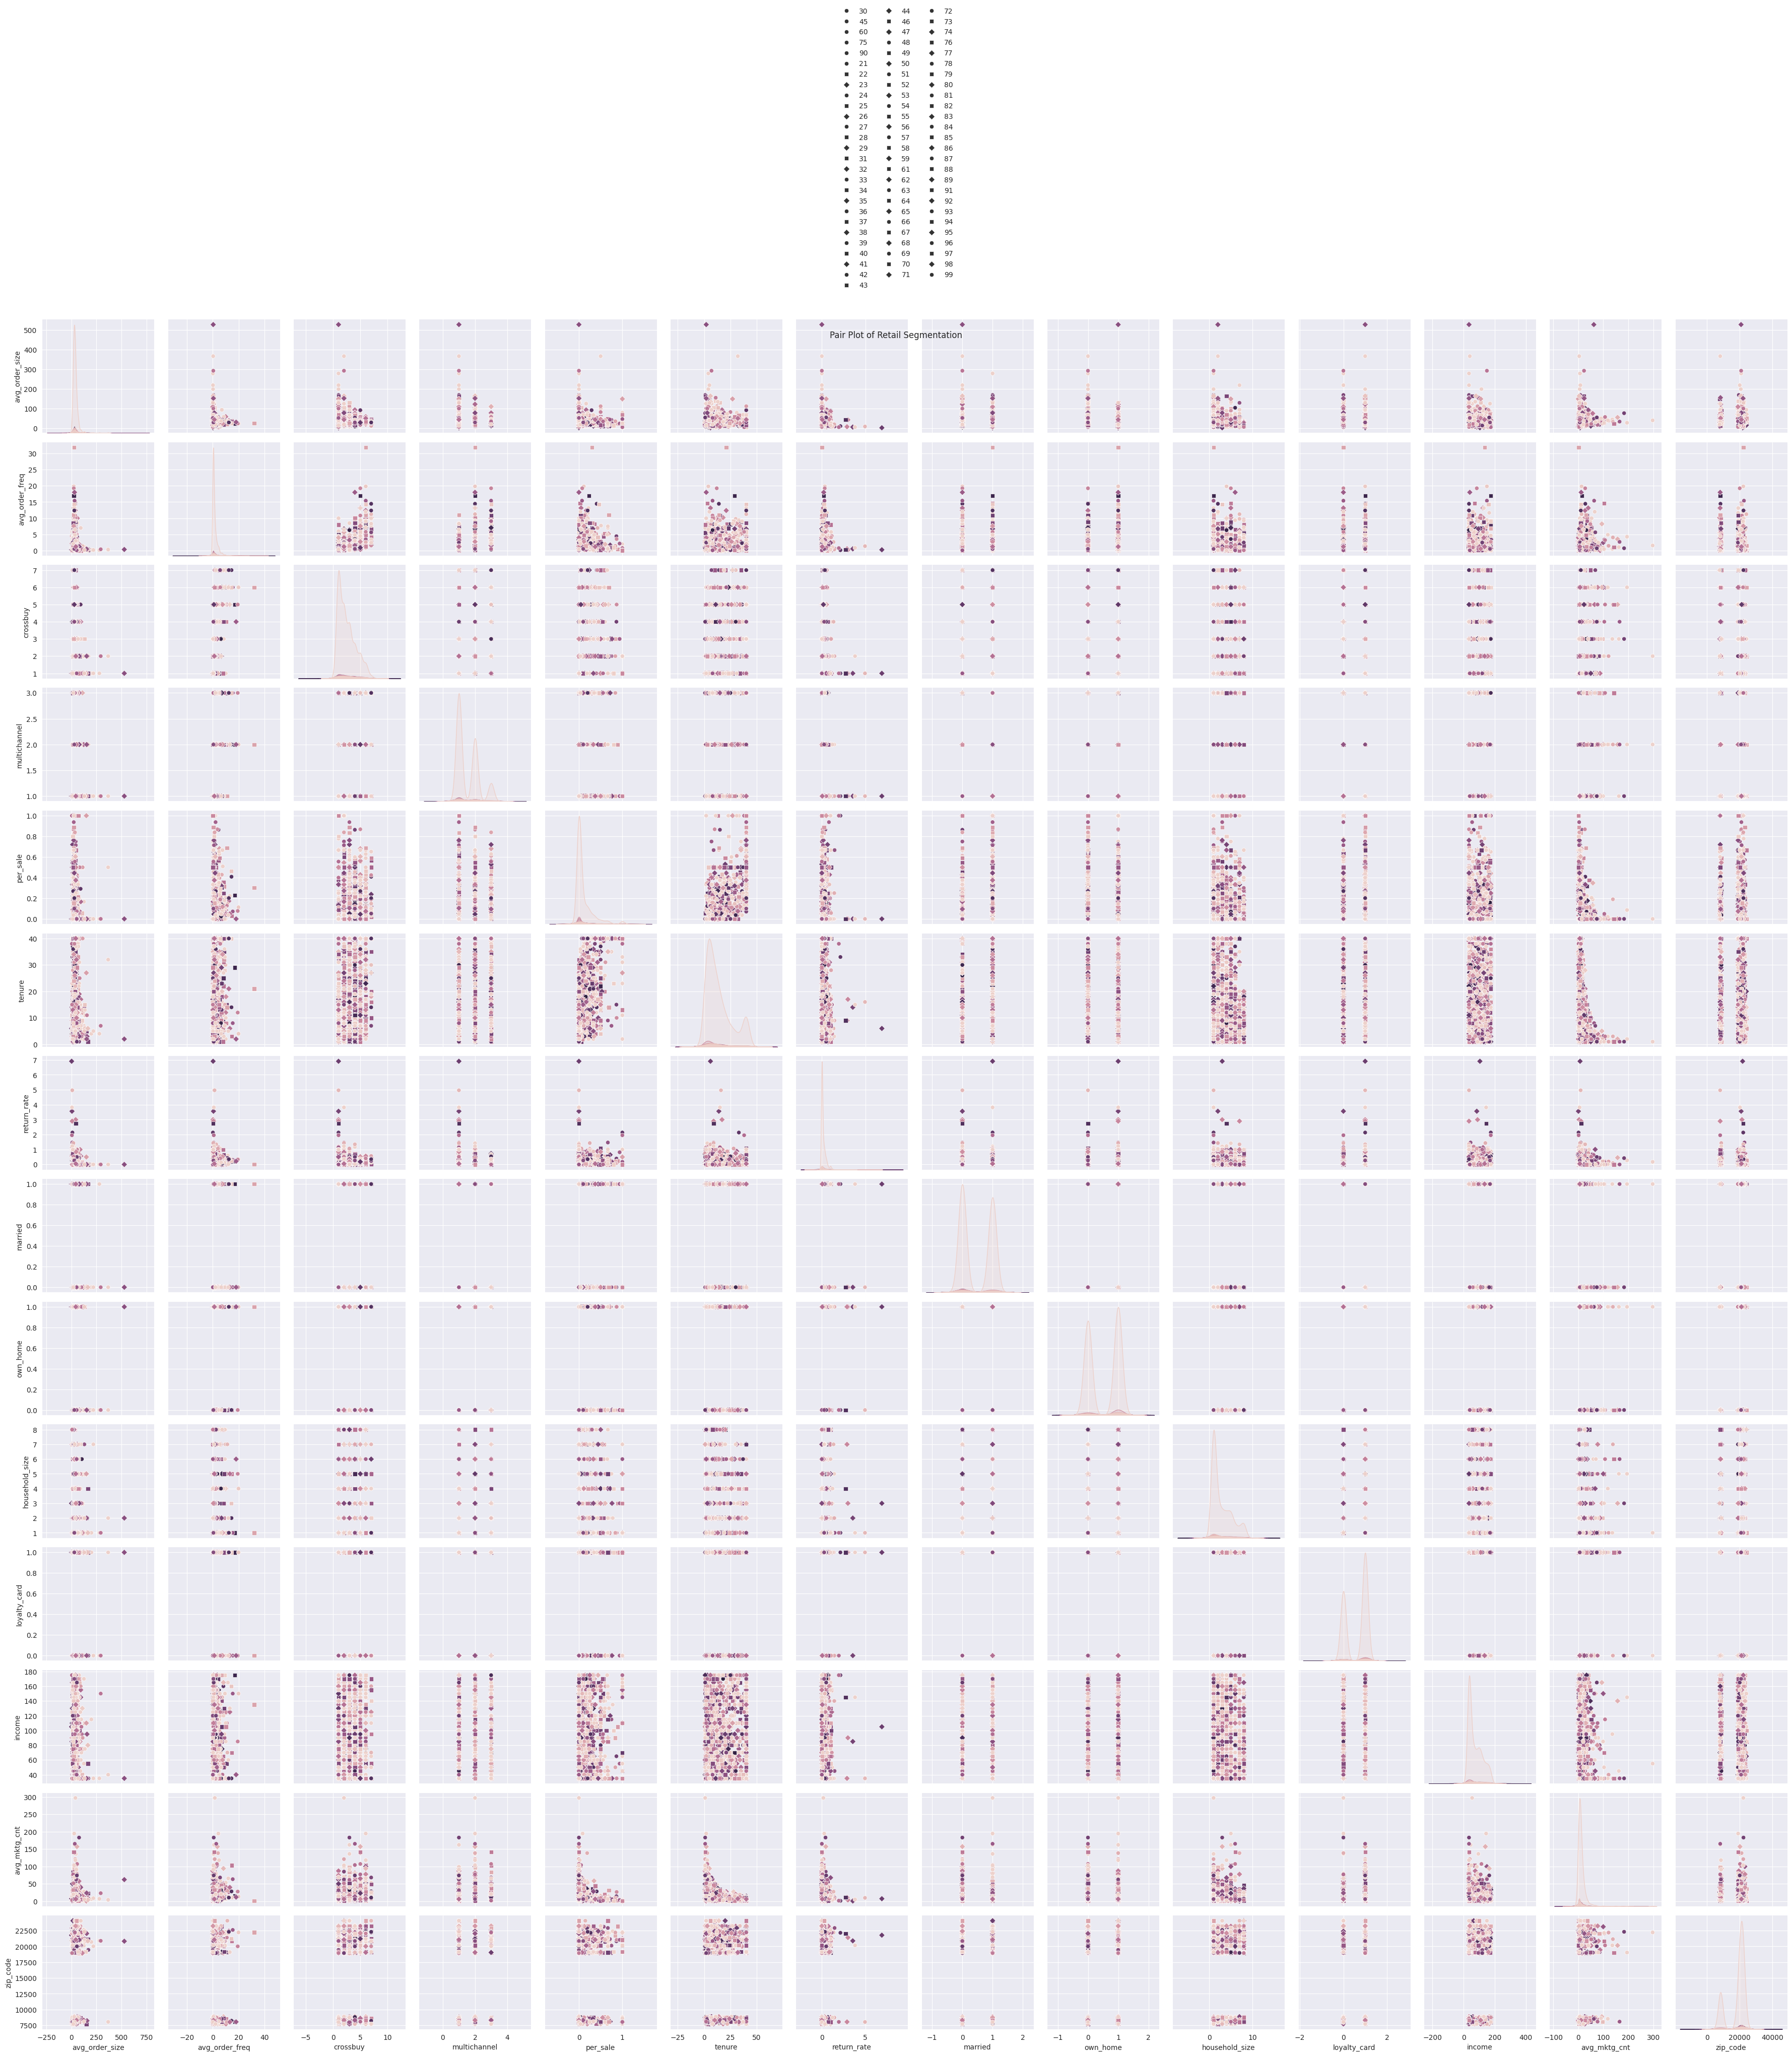

In [52]:
# Plot to visualize relationships between different attributes.
ax = sns.pairplot(data, hue='age', markers=["o", "s", "D"])
plt.suptitle("Pair Plot of Retail Segmentation")
sns.move_legend(
ax, "lower center",
bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

Histograms

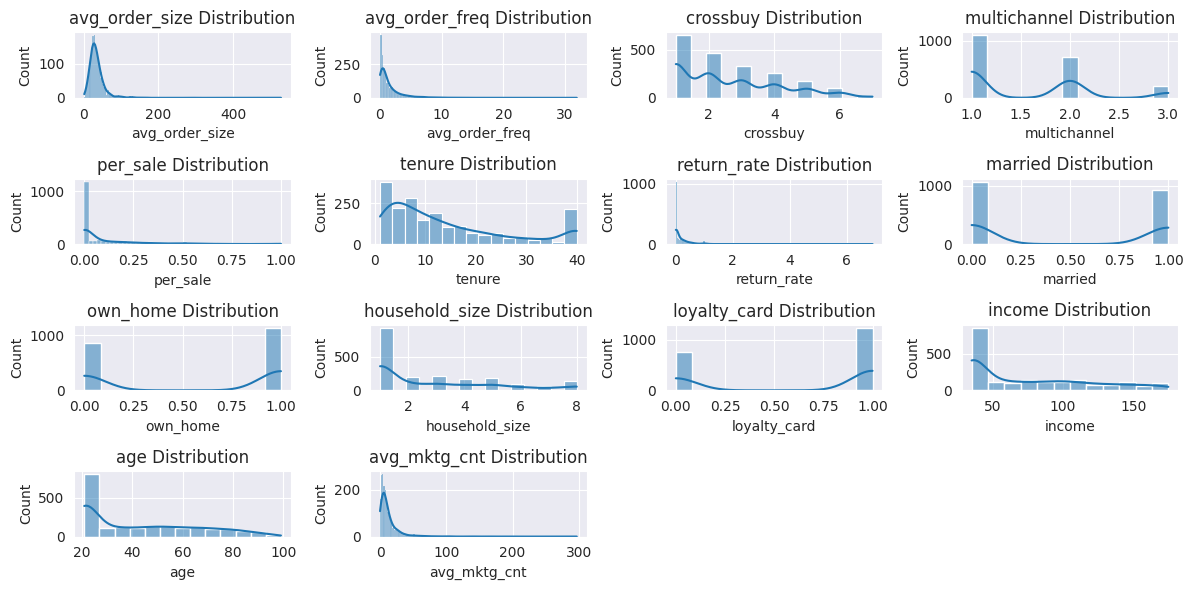

In [53]:
# Histograms for each column in data
cls=data.columns
plt.figure(figsize=(12, 6))
for i, feature in enumerate(cls[:-1]):
 plt.subplot(4, 4, i + 1)
 sns.histplot(data=data, x=feature, kde=True)
 plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

Correlation Heatmaps

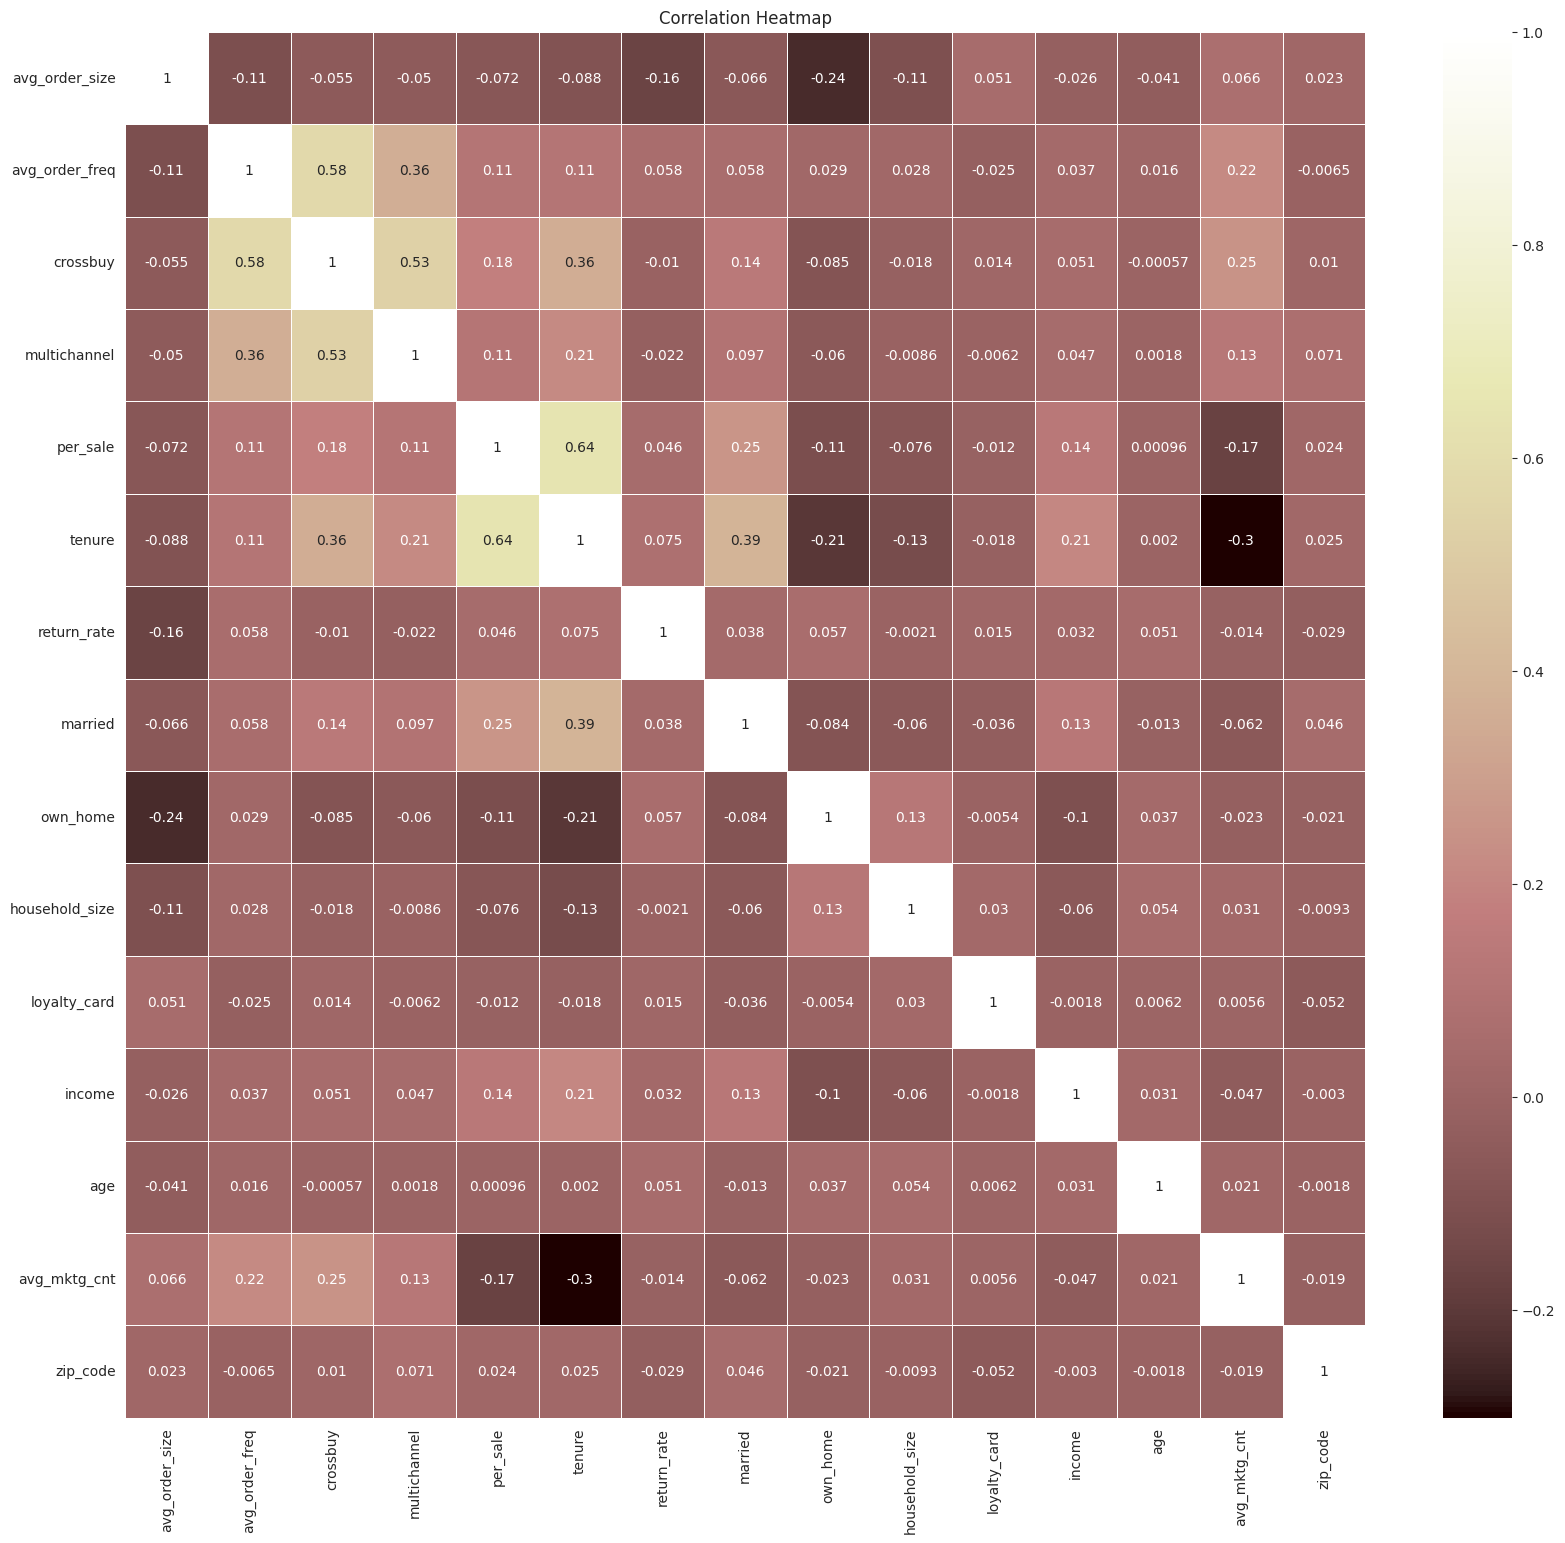

In [54]:
#Correlation matrix for all the columns in the data set
correlation_matrix = data.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='pink', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

tenure and avg_mkt_cnt has a correlation of -0.3 and avg_order_size and own_home correlation is -0.24.

Split the data set

In [55]:
# Spliting data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Implement LDA

In [56]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Visualize the data

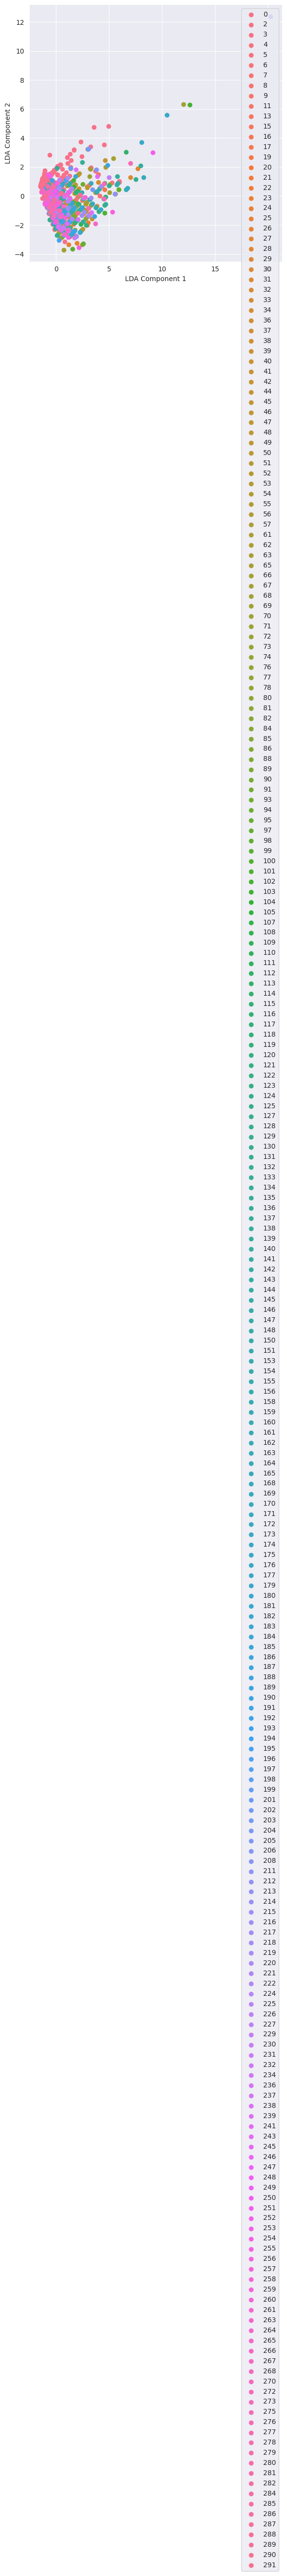

In [57]:
#Scatter Plot for LDA
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['age']=y_train
sns.FacetGrid(tmp_Df, hue ="age",
              height = 6).map(plt.scatter,
                'LDA Component 1',
                  'LDA Component 2')
plt.legend(loc='upper right')
plt.show()

In [58]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 0.56


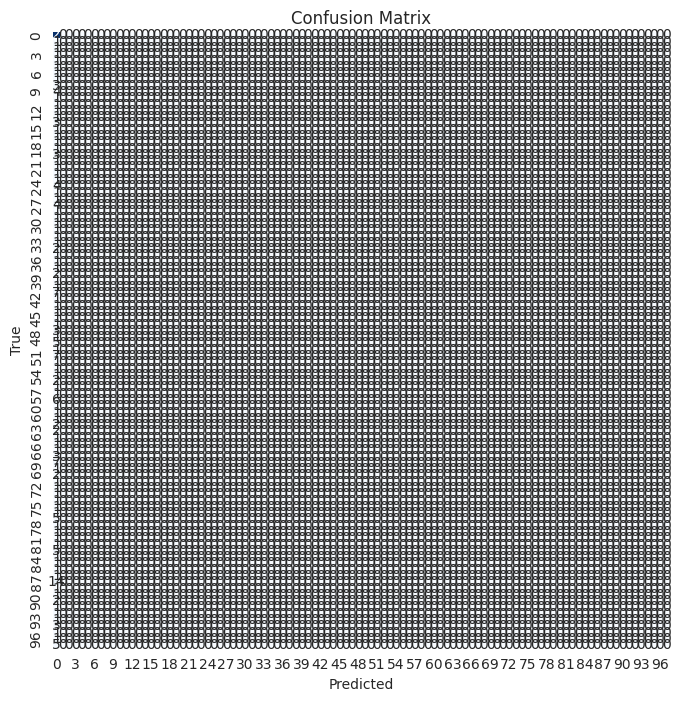

In [59]:
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
#Confusion Matrix as heat map
plt.figure(figsize=(8, 8))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Accuracy is 60%.